# Deep Learning
*Using tensorflow 1.5, CUDA 9.0, cuDNN 7.0 on Python 3.6 on a NVIDIA GeForce 920MX graphic card*

Comparison of simple and convolutionnal neural networks on the MNIST dataset

In [2]:
from IPython.display import Image, display

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Simple neural network

In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

In [40]:
#Loading dataset
train = pd.read_csv('train.csv')

#Scaling improves the optimization of the neural network
predictors = train.drop(columns=['label']).values / 255

#Get target variable as dummy variables
target = to_categorical(train['label'])

print("Shapes of predictors and target arrays:", predictors.shape, target.shape)

Shapes of predictors and target arrays: (42000, 784) (42000, 10)


In [41]:
%%time

#Creating the neural network model
n_cols = predictors.shape[1]

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))  #tanh à essayer !
#model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))  #10 digits to recognize

#Model compiling and fitting
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

#Performance monitor
early_stopping_monitor = EarlyStopping(patience=3)

#Fitting on data
model.fit(predictors, target, validation_split=0.2, epochs=5)#, callbacks=[early_stopping_monitor])

Train on 33600 samples, validate on 8400 samples
Epoch 1/5
33600/33600 [==============================] - 31s 927us/step - loss: 0.6878 - acc: 0.8046 - val_loss: 0.3536 - val_acc: 0.8979
Epoch 2/5
33600/33600 [==============================] - 28s 841us/step - loss: 0.3330 - acc: 0.9056 - val_loss: 0.2979 - val_acc: 0.9140
Epoch 3/5
33600/33600 [==============================] - 29s 876us/step - loss: 0.2913 - acc: 0.9167 - val_loss: 0.2800 - val_acc: 0.9190
Epoch 4/5
33600/33600 [==============================] - 29s 851us/step - loss: 0.2715 - acc: 0.9229 - val_loss: 0.2733 - val_acc: 0.9258
Epoch 5/5
33600/33600 [==============================] - 29s 872us/step - loss: 0.2581 - acc: 0.9264 - val_loss: 0.2646 - val_acc: 0.9242
Wall time: 2min 27s


C:\Users\Damien\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Submission dataset shape:  (28000, 784)
Predictions shape (contains pseudo-probabilities for each digit type) : (28000, 10)
20 first predictions on the submission digits: 
     label
0       2
1       0
2       9
3       9
4       3
5       7
6       0
7       3
8       0
9       3
10      5
11      7
12      4
13      0
14      4
15      5
16      3
17      1
18      9
19      0


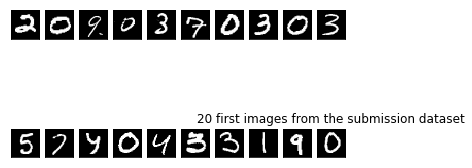

In [15]:
#Prepare the submission dataset
test = pd.read_csv('test.csv')
submission = test.values / 255
print("Submission dataset shape: ", submission.shape)

#Make predictions on the test set
predictions = model.predict(submission)  #Contains probabilities for each 10 digits
print("Predictions shape (contains pseudo-probabilities for each digit type) :", predictions.shape)

#Creating the submission dataframe
submission_df = pd.DataFrame(predictions)
submission_df['ImageId'] = pd.Series(range(1, 28001))
#Take the corresponding column label for the max value (probability) of the row
submission_df['label'] = submission_df.drop(columns=['ImageId']).idxmax(1)
print("20 first predictions on the submission digits: \n", submission_df[['label']].head(20))

#Print the 10 first images of the submission dataset
images_subset = test.iloc[:20, :]
for i, row in images_subset.iterrows():
    plt.subplot(2, 10, i+1)
    pixels = row.values.reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.title('20 first images from the submission dataset')
plt.show()

In [60]:
#Save the submission as csv
submission_df.loc[:, ['ImageId', 'label']].to_csv('submission_deeplearning_DB.csv', index=False)

## Convolutionnal Neural Network

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

In [5]:
#Loading dataset
train = pd.read_csv('train.csv')

#Reshape the data as images 28x28 pixels
predictors = train.drop(columns=['label']).values.reshape(42000, 28,28,1)
#Scaling improves the optimization of the neural network
predictors = predictors / 255

#Get target variable as dummy variables
target = to_categorical(train['label'])

print("Shapes of predictors and target arrays:", predictors.shape, target.shape)

Shapes of predictors and target arrays: (42000, 28, 28, 1) (42000, 10)


In [6]:
#Building of the neural network
cnn = Sequential()
#Input layer
cnn.add(Conv2D(30, kernel_size=(2,2), activation='relu', input_shape=(28,28,1)))
#Additional convolutional layers
cnn.add(Conv2D(30, kernel_size=(2,2), activation='relu'))
#Dropout layer to avoid overfitting
cnn.add(Dropout(0.5))
cnn.add(Conv2D(30, kernel_size=(2,2), activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Conv2D(30, kernel_size=(2,2), activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Conv2D(30, kernel_size=(2,2), activation='relu'))
cnn.add(Dropout(0.5))
#Flattening of the convolutionnal layer
cnn.add(Flatten())
#Dense layer between the flattening and output layers
cnn.add(Dense(200, activation='relu'))
#Output layer for 10 digits with probability values
cnn.add(Dense(10, activation='softmax'))

#Compile the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
%%time

#Training of the model
early_stopping_monitor = EarlyStopping(patience=3)
cnn.fit(predictors, target, validation_split=0.2, epochs=20, callbacks=[early_stopping_monitor] )

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 132s 4ms/step - loss: 0.1970 - acc: 0.9419 - val_loss: 0.0660 - val_acc: 0.9788
Epoch 2/20
33600/33600 [==============================] - 121s 4ms/step - loss: 0.0577 - acc: 0.9818 - val_loss: 0.0593 - val_acc: 0.9826
Epoch 3/20
 4608/33600 [===>..........................] - ETA: 1:39 - loss: 0.0381 - acc: 0.9885

Submission dataset shape:  (28000, 784)
Predictions shape (contains pseudo-probabilities for each digit type) : (28000, 10)
20 first predictions on the submission digits: 
     label
0       2
1       0
2       9
3       4
4       3
5       7
6       0
7       3
8       0
9       3
10      5
11      7
12      4
13      0
14      4
15      3
16      3
17      1
18      9
19      0


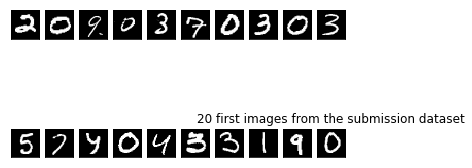

In [49]:
#Prepare the submission dataset
test = pd.read_csv('test.csv')
submission = test.values..reshape(len(test), 28,28,1) / 255
print("Submission dataset shape: ", submission.shape)

#Make predictions on the test set
predictions = model.predict(submission)  #Contains probabilities for each 10 digits
print("Predictions shape (contains pseudo-probabilities for each digit type) :", predictions.shape)

#Creating the submission dataframe
submission_df = pd.DataFrame(predictions)
submission_df['ImageId'] = pd.Series(range(1, 28001))
#Take the corresponding column label for the max value (probability) of the row
submission_df['label'] = submission_df.drop(columns=['ImageId']).idxmax(1)
print("20 first predictions on the submission digits: \n", submission_df[['label']].head(20))

#Print the 10 first images of the submission dataset
images_subset = test.iloc[:20, :]
for i, row in images_subset.iterrows():
    plt.subplot(2, 10, i+1)
    pixels = row.values.reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.title('20 first images from the submission dataset')
plt.show()

In [50]:
#Save the submission as csv
submission_df.loc[:, ['ImageId', 'label']].to_csv('submission_deeplearning_DB.csv', index=False)